In this notebook, I explore the transit of baroclinic eddies near moorings SIO1 and SIO3. 
At this point, there are plots for the following:
- Time-depth sections of ADCP and T measurements
- tz sections of filtered variables (periods longer than 4 days)
- Zoom into largest eddy event (April-May-June of 2019)

Let's begin by loading our data and necessary modules:

In [1]:
import sys; import matplotlib.pyplot as plt; import numpy as np
import xarray as xr; import netCDF4; import pandas as pd;
from scipy.signal import butter, filtfilt, freqz
  
# adding my module folders to the system path
sys.path.insert(0, '/home/noel/Documents/PISTON/Chapter3/xrdataset/')
import PISTON_Data 

sys.path.insert(0, '/home/noel/Documents/Software/POFuncs/')
import time_analysis as ta

SIO1 = PISTON_Data.create_SIO1(); # data sets to load
SSH = PISTON_Data.get_ssh();
SIO3 = PISTON_Data.create_SIO3();

SyntaxError: invalid syntax (PISTON_Data.py, line 110)

As promised, we begin with a plot of the raw ADCP and T data:


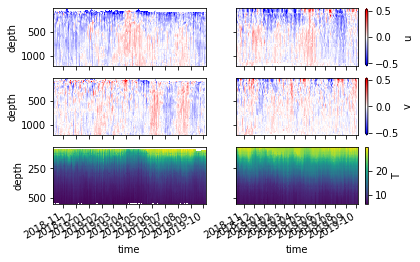

In [41]:
fig, ([ax1,ax4],[ax2,ax5],[ax3,ax6]) = plt.subplots(3,2,sharex=True);
SIO1['u'].plot(ax=ax1, yincrease=False, vmin = -0.5, vmax = 0.5, cmap = 'bwr', add_colorbar= False); 
plt.title('SIO1, at 12.3 N')
SIO1['v'].plot(ax=ax2, yincrease=False, vmin=-0.5, vmax = 0.5, cmap = 'bwr', add_colorbar = False);
SIO1['T'].sel(depth = slice(70,550)).plot(ax=ax3, yincrease=False, add_colorbar = False )

SIO3['u'].plot(ax=ax4, yincrease=False, vmin = -0.5, vmax = 0.5, cmap = 'bwr'); 
SIO3['v'].plot(ax=ax5, yincrease=False, vmin=-0.5, vmax = 0.5, cmap = 'bwr');
SIO3['T'].sel(depth = slice(70,550)).plot(ax=ax6, yincrease=False)

for nox in [ax1, ax2, ax4, ax5]:
    nox.set_xlabel(None);
    #nox.set_xticklabels(list());

for noy in [ax6,ax4,ax5]:
    noy.set_ylabel(None);
    noy.set_yticklabels(list());
    
fig.savefig('rawmoor.png', dpi = 300, facecolor = 'white')
    
#for incdate in [ax3,ax6]:
 #   incdate.set_xticks()

In [34]:
# Time to do some filtering

# Intraseasonal band
ISband = 1/3/24/3600;
ISO = xr.Dataset();
ISO['u1'] = xr.DataArray( ta.xpass( SIO1['u'][:,10:-10],1/3600, ISband, 'lowpass'),
                        coords = [SIO1.depth, SIO1.time[10:-10]],
                                  dims = ["depth", "time"]);
ISO['v1'] = xr.DataArray( ta.xpass( SIO1['v'][:,10:-10],1/3600, ISband, 'lowpass'),
                        coords = [SIO1.depth, SIO1.time[10:-10]],
                                  dims = ["depth", "time"]);
ISO['T1'] = xr.DataArray( ta.xpass( SIO1['T'][:,10:-10],1/3600, ISband, 'lowpass'),
                        coords = [SIO1.depth, SIO1.time[10:-10]],
                                  dims = ["depth", "time"]); # Intraseasonal T for mooring 1

ISO['u3'] = xr.DataArray( ta.xpass( SIO3['u'][:,10:-10],1/3600, ISband, 'lowpass'),
                        coords = [SIO3.depth, SIO3.time[10:-10]],
                                  dims = ["depth", "time"]);
ISO['v3'] = xr.DataArray( ta.xpass( SIO3['v'][:,10:-10],1/3600, ISband, 'lowpass'),
                        coords = [SIO3.depth, SIO3.time[10:-10]],
                                  dims = ["depth", "time"]);
ISO['T3'] = xr.DataArray( ta.xpass( SIO3['T'][:,10:-10],1/3600, ISband, 'lowpass'),
                        coords = [SIO3.depth, SIO3.time[10:-10]],
                                  dims = ["depth", "time"]); # Intraseasonal T for mooring 1

# Near-inertial band
f = 2*np.sin(12.5/180*np.pi)/24/3600; # radians per day
NIband = f*np.array([0.85, 1.3])

SSH['vort'] = SSH['vgos'].diff('longitude')/np.cos(15/180*np.pi)/110e3 - SSH['ugos'].diff('latitude')/110e3

# Near-inertial filtering:
nearf = xr.Dataset();
nearf['u1'] = xr.DataArray( ta.xpass(SIO1['u'][:,10:-10],1/3600,NIband,'bandpass'),                  
                coords = [SIO1.depth,SIO1.time[10:-10]],
                 dims = ["depth","time"])

nearf['v1'] = xr.DataArray( ta.xpass(SIO1['v'][:,10:-10],1/3600,NIband,'bandpass'),                  
                coords = [SIO1.depth,SIO1.time[10:-10]],
                 dims = ["depth","time"])

nearf['T1'] = xr.DataArray( ta.xpass(SIO1['T'][:,10:-10],0.5/3600,NIband,'bandpass'),
                coords = [SIO1.depth, SIO1.time[10:-10]],
                         dims = ["depth","time"]);

Intra-seasonal variations in mooring variables look like this:

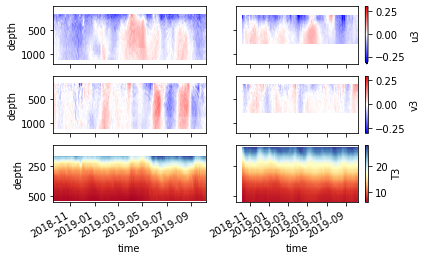

In [40]:
#%matplotlib notebook
fig, ([ax1,ax4],[ax2,ax5],[ax3,ax6]) = plt.subplots(3,2,sharex=True);

ISO['u1'].plot(ax=ax1, yincrease=False, vmin = -0.3, vmax = 0.3, cmap = 'bwr', add_colorbar = False); 
ISO['v1'].plot(ax=ax2, yincrease=False, vmin=-0.3, vmax = 0.3, cmap = 'bwr', add_colorbar = False);
ISO['T1'].sel(depth = slice(70,550)).plot(ax=ax3, yincrease=False, cmap = 'RdYlBu', add_colorbar = False)

ISO['u3'].plot(ax=ax4, yincrease=False, vmin = -0.3, vmax = 0.3, cmap = 'bwr'); 
ISO['v3'].plot(ax=ax5, yincrease=False, vmin=-0.3, vmax = 0.3, cmap = 'bwr');
ISO['T3'].sel(depth = slice(70,550)).plot(ax=ax6, yincrease=False, cmap = 'RdYlBu')

for nox in [ax1, ax2, ax4, ax5]:
    nox.set_xlabel(None);
    #nox.set_xticklabels(list());

for noy in [ax6,ax4,ax5]:
    noy.set_ylabel(None);
    noy.set_yticklabels(list());
    
fig.savefig('lowfreqmoor.png', dpi = 300, facecolor = 'white')

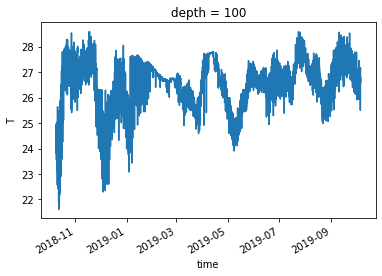

In [36]:
SIO3['T'].sel(depth = 100).plot()

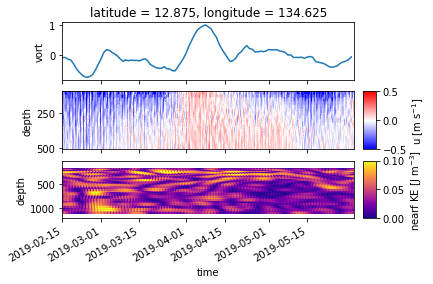

In [39]:
# Plot sliced datasets 
timelims = ("2019-02-01","2019-06-30");

fig, (ax1, ax2, ax3) = plt.subplots( 3, 1, sharex= True );
(SSH['vort']/f).sel( time = slice("2019-01-15","2019-05-31"), latitude = 12.875, 
        longitude = 134.625 ).plot(ax=ax1);
ax1.set_ylabel = '$\zeta_g/f$ from SSH'
im1 =  (np.sqrt(nearf['u1']**2 + nearf['v1']**2)).sel( time = slice("2019-02-01","2019-05-31") ).plot(ax=ax3,
        vmin = 0, vmax = 0.1, cmap = 'plasma', robust = True, 
        add_colorbar=False, yincrease=False  )

im2 =  (SIO1['u']).sel(depth = slice(100, 1000), time = slice("2019-02-15","2019-05-31")).plot(ax=ax2,
        vmin = -.5, vmax = 0.5, robust = True, add_colorbar=False, yincrease=False, 
        cmap = 'bwr')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.44, 0.03, 0.2])
fig.colorbar(im2, cax=cbar_ax)
cbar_ax.set_ylabel(r'u [m s$^{-1}$]');

cbar_ax = fig.add_axes([0.82, 0.2, 0.03, 0.2])
fig.colorbar(im1, cax=cbar_ax)
cbar_ax.set_ylabel(r'nearf KE [J m$^{-3}$]');

fig.savefig('eddy_zoom.png', dpi = 300, facecolor = 'white');

In [127]:
nearf_u.plot()

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

In [49]:
SIO1.data_vars

Data variables:
    u        (depth, time) float64 nan nan nan nan nan nan nan nan nan nan ...
    v        (depth, time) float64 0.0 0.0 0.0 0.0 0.0 0.0 nan nan nan nan ...
    T        (depth, time) float64 nan nan nan nan nan nan nan nan nan nan ...